In [1]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from skikit learn
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

# Model Evaluations
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,0,1,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,0,1,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# Change "higher" column to binary numbers, yes=1 and no=0
df.replace(('yes', 'no'), (1, 0), inplace=True)

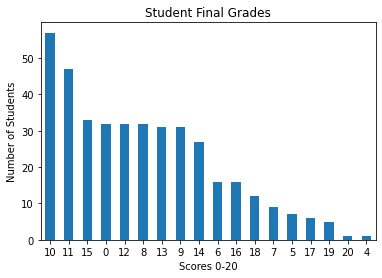

In [6]:
#Easiest way to understand the dataset in it's current format
df["G3"].value_counts().plot(kind="bar")
plt.title("Student Final Grades")
plt.xlabel("Scores 0-20")
plt.ylabel("Number of Students")
plt.xticks(rotation=0);

In [7]:
#Check if there are any missing values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

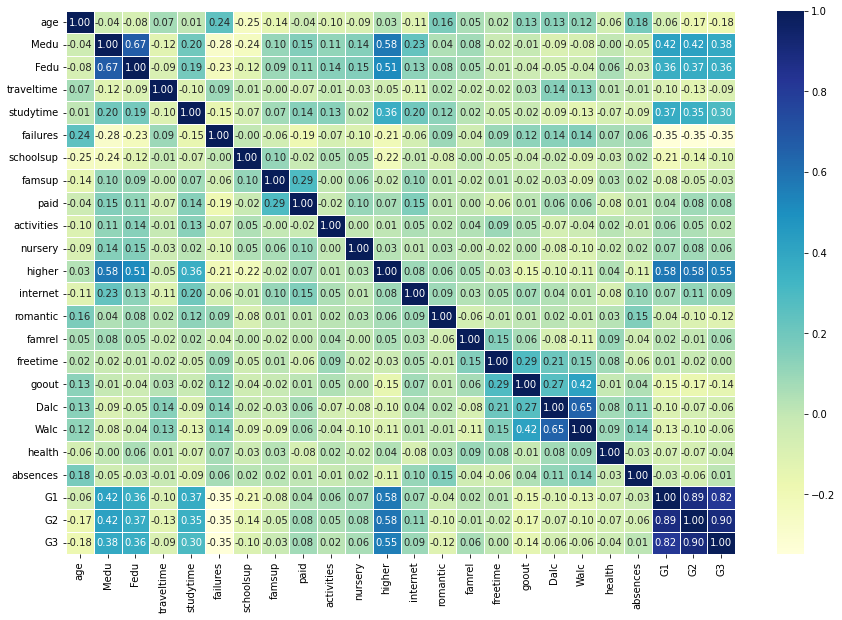

In [8]:
#Correlation matrix (Heatmap) of the current dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [9]:
#Drop the columns of the features with the lowest correlation
reduced_df = df[["Medu", "Fedu", "studytime", "failures", "higher", "Dalc", "Walc", "G1", "G2", "G3"]]
reduced_df.head()

,Medu,Fedu,studytime,failures,higher,Dalc,Walc,G1,G2,G3
0,0,1,1,0,0,1,1,5,6,6
1,1,1,1,0,0,1,1,5,5,6
2,1,1,2,3,1,2,3,7,8,10
3,4,2,3,0,1,1,1,15,14,15
4,3,3,1,0,1,1,2,6,10,10


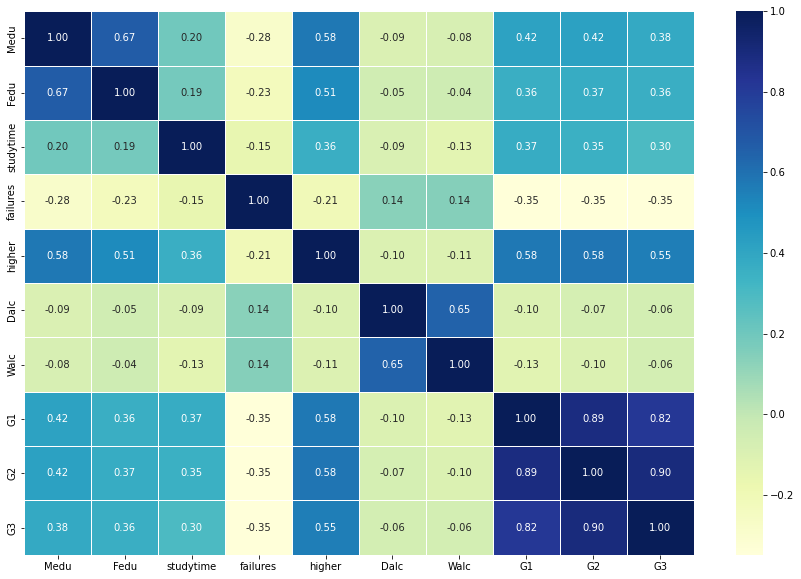

In [10]:
#Run a new heatmap
corr_matrix = reduced_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [11]:
# Split data into X and Y
# X will be all columns EXCEPT target, Y will be the target
X = reduced_df.drop("G3", axis=1)
y = reduced_df["G3"]

# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [12]:
# Put models in a dictionary
models = { "Ridge": Ridge(),
         "RandomForest": RandomForestRegressor(),
         "LRegression": LinearRegression(),
         "ElasticNet": ElasticNet()}

#Create a function to fit (train) and score (test) models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [13]:
model_scores = fit_and_score(models=models, 
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Ridge': 0.7220090510499807,
 'RandomForest': 0.8387157746156393,
 'LRegression': 0.7220965226751139,
 'ElasticNet': 0.7221313221967428}

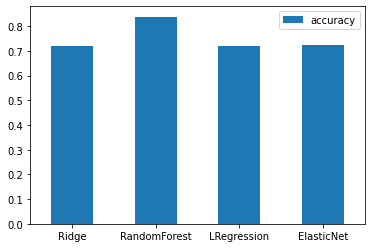

In [14]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

In [19]:
# Let's check MAE and MSE to calculate the error
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating the performance of the Random Forest Regression Model
rf = RandomForestRegressor(random_state=42)
rfModel = rf.fit(X_train, y_train)
y_pred_r = rfModel.predict(X_test)
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f"MAE: {mae_r}  \nMSE: {mse_r}")

MAE: 1.2915375  
MSE: 3.3596715284722216


In [18]:
# Let's create a visualization to see if it helps us understand.
df1 = pd.DataFrame(data={"actual values": y_test, "predicted values": y_pred_r})
df1["differences"] = df1["predicted values"] - df1["actual values"]
df1

,actual values,predicted values,differences
78,10,7.320000,-2.680000
371,12,12.000000,0.000000
248,5,2.140000,-2.860000
55,10,9.460000,-0.540000
390,9,8.950000,-0.050000
223,13,12.690000,-0.310000
42,18,18.770000,0.770000
234,6,7.270000,1.270000
316,0,4.420000,4.420000
116,14,13.720000,-0.280000
